In [39]:
# import statements

from __future__ import division
import tensorflow as tf
import numpy as np
import tarfile
import os
import matplotlib.pyplot as plt
import time

# Display plots inline 
%matplotlib inline

In [40]:
# import email data

def csv_to_numpy_array(filePath, delimiter):
    return np.genfromtxt(filePath, delimiter=delimiter, dtype=None)

def import_data():
    if "data" not in os.listdir(os.getcwd()):
        # Untar directory of data if we haven't already
        tarObject = tarfile.open("data.tar.gz")
        tarObject.extractall()
        tarObject.close()
        print("Extracted tar to current directory")
    else:
        # we've already extracted the files
        pass

    print("loading training data")
    trainX = csv_to_numpy_array("data/trainX.csv", delimiter="\t")
    trainY = csv_to_numpy_array("data/trainY.csv", delimiter="\t")
    print("loading test data")
    testX = csv_to_numpy_array("data/testX.csv", delimiter="\t")
    testY = csv_to_numpy_array("data/testY.csv", delimiter="\t")
    return trainX,trainY,testX,testY

trainX,trainY,testX,testY = import_data()

loading training data
loading test data


In [41]:
# set parameters for training

# features, labels
numFeatures = trainX.shape[1]
numLabels = trainY.shape[1]

In [42]:
# define placeholders and variables for use in training

X = tf.placeholder(tf.float32, [None, numFeatures])
yGold = tf.placeholder(tf.float32, [None, numLabels])

weights = tf.Variable(tf.random_normal([numFeatures,numLabels],
                                       mean=0,
                                       stddev=(np.sqrt(6/numFeatures+
                                                         numLabels+1)),
                                       name="weights"))
bias = tf.Variable(tf.random_normal([1,numLabels],
                                    mean=0,
                                    stddev=(np.sqrt(6/numFeatures+numLabels+1)),
                                    name="bias"))

In [43]:
# initialize variables
init_OP = tf.initialize_all_variables()

# define feedforward algorithm
y = tf.nn.sigmoid(tf.add(tf.matmul(X, weights, name="apply_weights"), bias, name="add_bias"), name="activation")

# define cost function and optimization algorithm (gradient descent)
learningRate = tf.train.exponential_decay(learning_rate=0.0008,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)
cost_OP = tf.nn.l2_loss(y-yGold, name="squared_error_cost")
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)

# accuracy function
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(yGold,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [26]:
numEpochs = 10000
learningRate = tf.train.exponential_decay(learning_rate=0.0008,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)
# Launch the graph
errors = []
with tf.Session() as sess:
    sess.run(init_OP )
    print('Initialized Session.')
    for step in range(numEpochs):
        # run optimizer at each step in training
        sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
        # fill errors array with updated error values
        accuracy_value = accuracy.eval(feed_dict={X: trainX, yGold: trainY})
        errors.append(1 - accuracy_value)
    print('Optimization Finished!')
    
    # output final error
    print("Final error found during training: ", errors[-1])
    # output accuracy 
    print("final accuracy on test set: %s" %str(sess.run(accuracy, 
                                                     feed_dict={X: testX, 
                                                                yGold: testY})))

Initialized Session.
Optimization Finished!
Final error found during training:  0.0933892726898
final accuracy on test set: 0.838095


/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


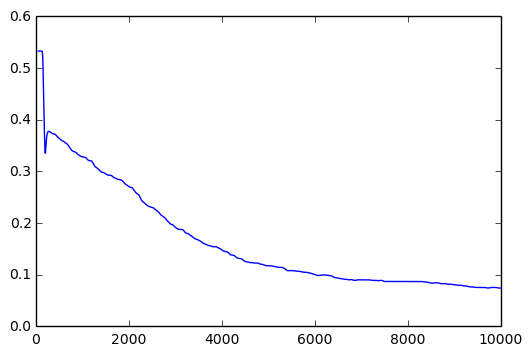

In [55]:
# plot errors array to see how it decreased
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()

In [58]:
# before running new training, make sure to re-initialize and define weights and biases above.
numEpochs = 15000
learningRate = tf.train.exponential_decay(learning_rate=0.0008,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)
# Launch the graph
errors = []
with tf.Session() as sess:
    sess.run(init_OP )
    print('Initialized Session.')
    for step in range(numEpochs):
        # run optimizer at each step in training
        sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
        # fill errors array with updated error values
        accuracy_value = accuracy.eval(feed_dict={X: trainX, yGold: trainY})
        errors.append(1 - accuracy_value)
    print('Optimization Finished!')
    
    # output final error
    print("Final error found during training: ", errors[-1])
    # output accuracy 
    print("final accuracy on test set: %s" %str(sess.run(accuracy, 
                                                     feed_dict={X: testX, 
                                                                yGold: testY})))

Initialized Session.
Optimization Finished!
Final error found during training:  0.0619097352028
final accuracy on test set: 0.895238


/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


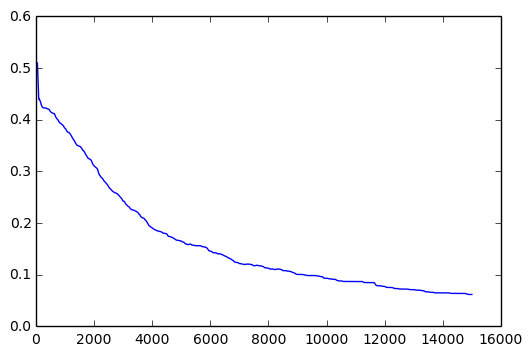

In [59]:
# plot errors array to see how it decreased
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()

In [62]:
# before running new training, make sure to re-initialize and define weights and biases above.
learningRate = tf.train.exponential_decay(learning_rate=0.001,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)
numEpochs = 15000
# Launch the graph
errors = []
with tf.Session() as sess:
    sess.run(init_OP )
    print('Initialized Session.')
    for step in range(numEpochs):
        # run optimizer at each step in training
        sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
        # fill errors array with updated error values
        accuracy_value = accuracy.eval(feed_dict={X: trainX, yGold: trainY})
        errors.append(1 - accuracy_value)
    print('Optimization Finished!')
    
    # output final error
    print("Final error found during training: ", errors[-1])
    # output accuracy 
    print("final accuracy on test set: %s" %str(sess.run(accuracy, 
                                                     feed_dict={X: testX, 
                                                                yGold: testY})))

Initialized Session.
Optimization Finished!
Final error found during training:  0.0503672361374
final accuracy on test set: 0.933333


/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


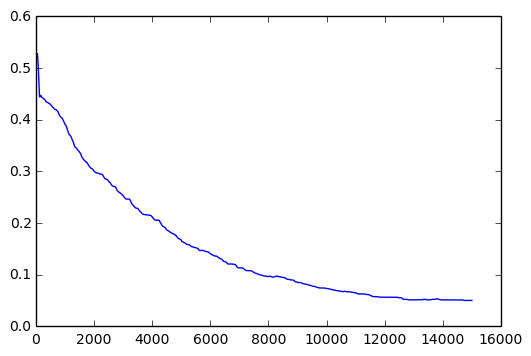

In [63]:
# plot errors array to see how it decreased
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()

In [7]:
# before running new training, make sure to re-initialize and define weights and biases above.
learningRate = tf.train.exponential_decay(learning_rate=0.001,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)
numEpochs = 20000
# Launch the graph
errors = []
with tf.Session() as sess:
    sess.run(init_OP )
    print('Initialized Session.')
    for step in range(numEpochs):
        # run optimizer at each step in training
        sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
        # fill errors array with updated error values
        accuracy_value = accuracy.eval(feed_dict={X: trainX, yGold: trainY})
        errors.append(1 - accuracy_value)
    print('Optimization Finished!')
    
    # output final error
    print("Final error found during training: ", errors[-1])
    # output accuracy 
    print("final accuracy on test set: %s" %str(sess.run(accuracy, 
                                                     feed_dict={X: testX, 
                                                                yGold: testY})))

Initialized Session.
Optimization Finished!
Final error found during training:  0.0535151958466
final accuracy on test set: 0.895238


/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


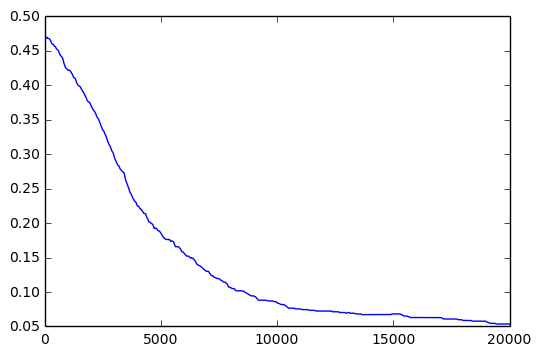

In [8]:
# plot errors array to see how it decreased
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()

In [11]:
# before running new training, make sure to re-initialize and define weights and biases above.
learningRate = tf.train.exponential_decay(learning_rate=0.0001,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)
numEpochs = 20000
# Launch the graph
errors = []
with tf.Session() as sess:
    sess.run(init_OP )
    print('Initialized Session.')
    for step in range(numEpochs):
        # run optimizer at each step in training
        sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
        # fill errors array with updated error values
        accuracy_value = accuracy.eval(feed_dict={X: trainX, yGold: trainY})
        errors.append(1 - accuracy_value)
    print('Optimization Finished!')
    
    # output final error
    print("Final error found during training: ", errors[-1])
    # output accuracy 
    print("final accuracy on test set: %s" %str(sess.run(accuracy, 
                                                     feed_dict={X: testX, 
                                                                yGold: testY})))

Initialized Session.
Optimization Finished!
Final error found during training:  0.0524659156799
final accuracy on test set: 0.933333


/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


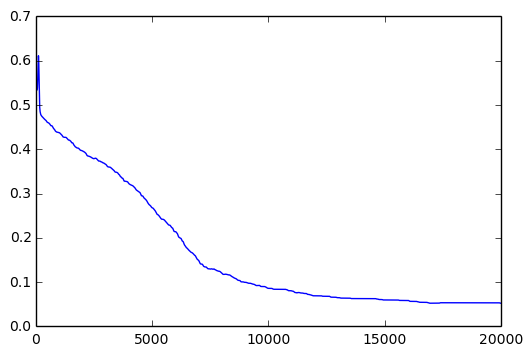

In [12]:
# plot errors array to see how it decreased
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()

In [15]:
# before running new training, make sure to re-initialize and define weights and biases above.
learningRate = tf.train.exponential_decay(learning_rate=0.0001,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)
numEpochs = 25000
# Launch the graph
errors = []
with tf.Session() as sess:
    sess.run(init_OP )
    print('Initialized Session.')
    for step in range(numEpochs):
        # run optimizer at each step in training
        sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
        # fill errors array with updated error values
        accuracy_value = accuracy.eval(feed_dict={X: trainX, yGold: trainY})
        errors.append(1 - accuracy_value)
    print('Optimization Finished!')
    
    # output final error
    print("Final error found during training: ", errors[-1])
    # output accuracy 
    print("final accuracy on test set: %s" %str(sess.run(accuracy, 
                                                     feed_dict={X: testX, 
                                                                yGold: testY})))

Initialized Session.
Optimization Finished!
Final error found during training:  0.0503672361374
final accuracy on test set: 0.914286


/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


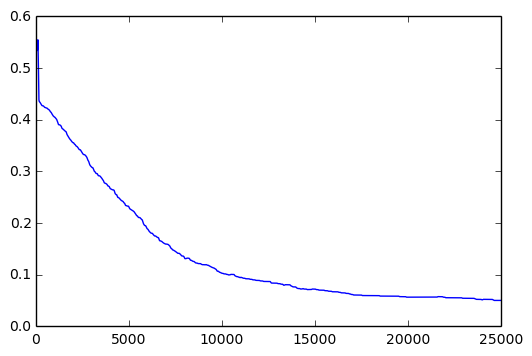

In [16]:
# plot errors array to see how it decreased
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()

In [19]:
# before running new training, make sure to re-initialize and define weights and biases above.
learningRate = tf.train.exponential_decay(learning_rate=0.0001,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)
numEpochs = 26000
# Launch the graph
errors = []
with tf.Session() as sess:
    sess.run(init_OP )
    print('Initialized Session.')
    for step in range(numEpochs):
        # run optimizer at each step in training
        sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
        # fill errors array with updated error values
        accuracy_value = accuracy.eval(feed_dict={X: trainX, yGold: trainY})
        errors.append(1 - accuracy_value)
    print('Optimization Finished!')
    
    # output final error
    print("Final error found during training: ", errors[-1])
    # output accuracy 
    print("final accuracy on test set: %s" %str(sess.run(accuracy, 
                                                     feed_dict={X: testX, 
                                                                yGold: testY})))

Initialized Session.
Optimization Finished!
Final error found during training:  0.0440713763237
final accuracy on test set: 0.92381


/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


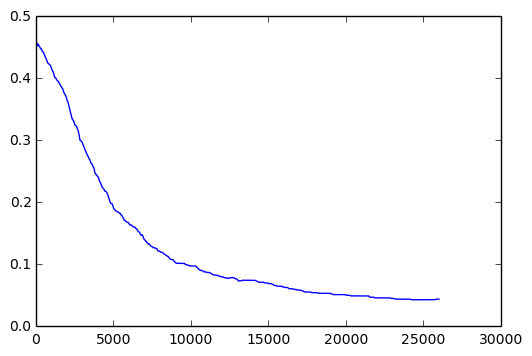

In [20]:
# plot errors array to see how it decreased
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()

In [35]:
# before running new training, make sure to re-initialize and define weights and biases above.
learningRate = tf.train.exponential_decay(learning_rate=0.0001,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)
numEpochs = 27000
# Launch the graph
errors = []
with tf.Session() as sess:
    sess.run(init_OP )
    print('Initialized Session.')
    for step in range(numEpochs):
        # run optimizer at each step in training
        sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
        # fill errors array with updated error values
        accuracy_value = accuracy.eval(feed_dict={X: trainX, yGold: trainY})
        errors.append(1 - accuracy_value)
    print('Optimization Finished!')
    
    # output final error
    print("Final error found during training: ", errors[-1])
    # output accuracy 
    print("final accuracy on test set: %s" %str(sess.run(accuracy, 
                                                     feed_dict={X: testX, 
                                                                yGold: testY})))

Initialized Session.
Optimization Finished!
Final error found during training:  0.0482686161995
final accuracy on test set: 0.914286


/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


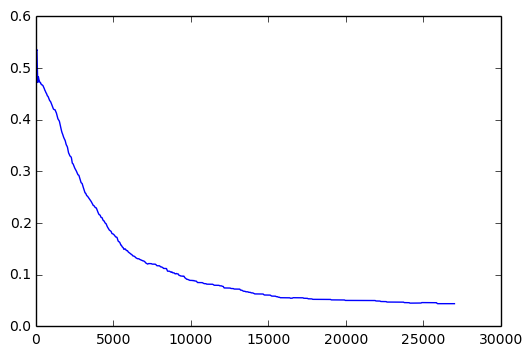

In [24]:
# plot errors array to see how it decreased
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()

In [27]:
# before running new training, make sure to re-initialize and define weights and biases above.
learningRate = tf.train.exponential_decay(learning_rate=0.00001,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)
numEpochs = 26000
# Launch the graph
errors = []
with tf.Session() as sess:
    sess.run(init_OP )
    print('Initialized Session.')
    for step in range(numEpochs):
        # run optimizer at each step in training
        sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
        # fill errors array with updated error values
        accuracy_value = accuracy.eval(feed_dict={X: trainX, yGold: trainY})
        errors.append(1 - accuracy_value)
    print('Optimization Finished!')
    
    # output final error
    print("Final error found during training: ", errors[-1])
    # output accuracy 
    print("final accuracy on test set: %s" %str(sess.run(accuracy, 
                                                     feed_dict={X: testX, 
                                                                yGold: testY})))

Initialized Session.
Optimization Finished!
Final error found during training:  0.0482686161995
final accuracy on test set: 0.904762


/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


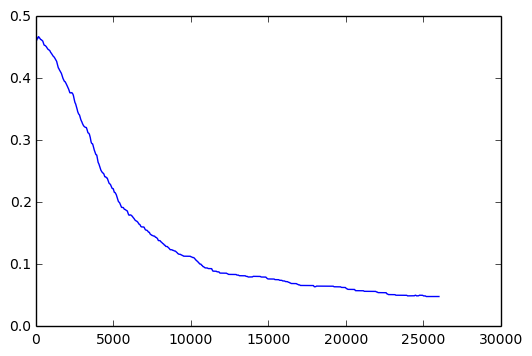

In [28]:
# plot errors array to see how it decreased
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()

In [31]:
# before running new training, make sure to re-initialize and define weights and biases above.
learningRate = tf.train.exponential_decay(learning_rate=0.0001,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)
numEpochs = 28000
# Launch the graph
errors = []
with tf.Session() as sess:
    sess.run(init_OP )
    print('Initialized Session.')
    for step in range(numEpochs):
        # run optimizer at each step in training
        sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
        # fill errors array with updated error values
        accuracy_value = accuracy.eval(feed_dict={X: trainX, yGold: trainY})
        errors.append(1 - accuracy_value)
    print('Optimization Finished!')
    
    # output final error
    print("Final error found during training: ", errors[-1])
    # output accuracy 
    print("final accuracy on test set: %s" %str(sess.run(accuracy, 
                                                     feed_dict={X: testX, 
                                                                yGold: testY})))

Initialized Session.
Optimization Finished!
Final error found during training:  0.0472193360329
final accuracy on test set: 0.914286


/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


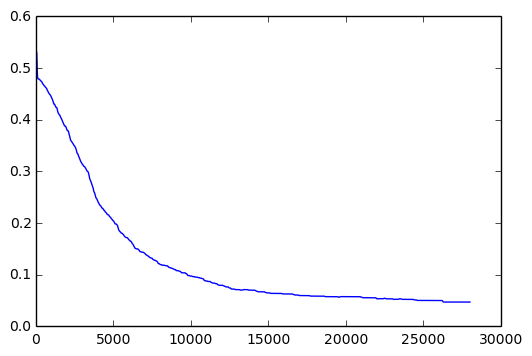

In [32]:
# plot errors array to see how it decreased
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()

Part A:

1. The best accuracy I got on the test data was = 0.942857
2. Optimum value of numEpochs and learningRate that gave the above accuracy are: 26000 and 0.0001 respectively. 
3. Please see the graph plotted below.

/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


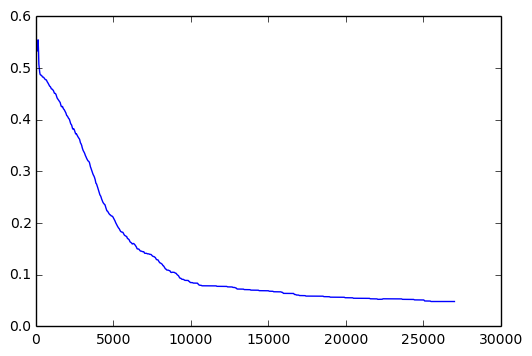

In [36]:
# plot errors array to see how it decreased
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()

Part B is below:

In [44]:
# re-define variables and algorithms to include neural network layers
# --> starting with three additional layers.

# define placeholders and variables for use in training

X = tf.placeholder(tf.float32, [None, numFeatures])
yGold = tf.placeholder(tf.float32, [None, numLabels])

hidden1 = 4
hidden2 = numLabels

w1 = tf.Variable(tf.random_normal([numFeatures,hidden1],
                                       mean=0,
                                       stddev=(np.sqrt(6/numFeatures+
                                                         numLabels+1)),
                                       name="weights"))
b1 = tf.Variable(tf.random_normal([1,hidden1],
                                    mean=0,
                                    stddev=(np.sqrt(6/numFeatures+numLabels+1)),
                                    name="bias"))
w2 = tf.Variable(tf.random_normal([hidden1,hidden2],
                                       mean=0,
                                       stddev=(np.sqrt(6/numFeatures+
                                                         numLabels+1)),
                                       name="weights"))
b2 = tf.Variable(tf.random_normal([1,hidden2],
                                    mean=0,
                                    stddev=(np.sqrt(6/numFeatures+numLabels+1)),
                                    name="bias"))

# initialize variables
init_OP = tf.initialize_all_variables()

# define feedforward algorithms
h1 = tf.nn.sigmoid(tf.add(tf.matmul(X, w1), b1))
y = tf.nn.sigmoid(tf.add(tf.matmul(h1, w2), b2))

# define cost function and optimization algorithm (gradient descent)
cost_OP = tf.nn.l2_loss(y-yGold, name="squared_error_cost")
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)

# accuracy function
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(yGold,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [45]:
# before running new training, make sure to re-initialize and define weights and biases above.
learningRate = tf.train.exponential_decay(learning_rate=0.0001,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)
numEpochs = 26000
# Launch the graph
errors = []
with tf.Session() as sess:
    sess.run(init_OP )
    print('Initialized Session.')
    for step in range(numEpochs):
        # run optimizer at each step in training
        sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
        # fill errors array with updated error values
        accuracy_value = accuracy.eval(feed_dict={X: trainX, yGold: trainY})
        errors.append(1 - accuracy_value)
    print('Optimization Finished!')
    
    # output final error
    print("Final error found during training: ", errors[-1])
    # output accuracy 
    print("final accuracy on test set: %s" %str(sess.run(accuracy, 
                                                     feed_dict={X: testX, 
                                                                yGold: testY})))

Initialized Session.
Optimization Finished!
Final error found during training:  0.0104931592941
final accuracy on test set: 0.990476


/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


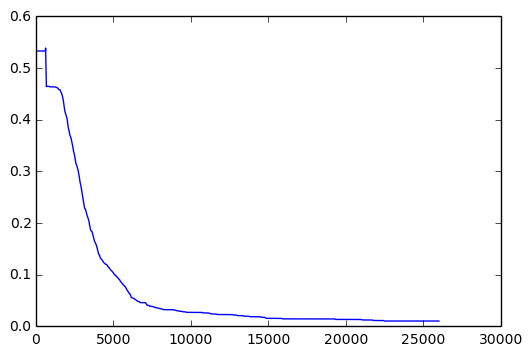

In [46]:
# plot errors array to see how it decreased
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()

Part B: By adding in one hidden layer to the neural network, I was able to improve the accuracy on the test set to 0.99476!